In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('../cleaned_cpo_price.csv', index_col="Date").dropna()
df.index = pd.to_datetime(df.index, format="%d/%m/%Y")
df

,Price
Date,
2022-01-03,5214.0
2022-01-04,5245.5
2022-01-05,5331.0
2022-01-06,5340.0
2022-01-07,5336.0
...,...
2022-12-21,3901.5
2022-12-22,3886.5
2022-12-23,3890.5


In [3]:
returns = 100 * df.Price.pct_change().dropna()
returns

Date
2022-01-04    0.604143
2022-01-05    1.629969
2022-01-06    0.168824
2022-01-07   -0.074906
2022-01-10    0.206147
                ...   
2022-12-21    0.218341
2022-12-22   -0.384468
2022-12-23    0.102920
2022-12-27    3.328621
2022-12-28    0.634328
Name: Price, Length: 236, dtype: float64

Text(0.5, 1.0, 'DIS Returns')

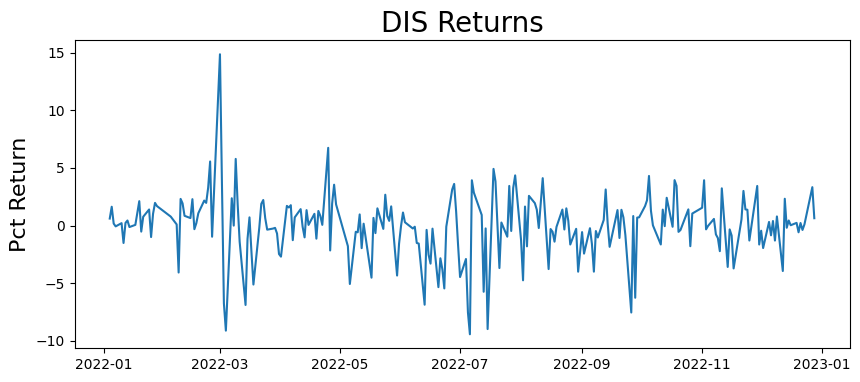

In [4]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

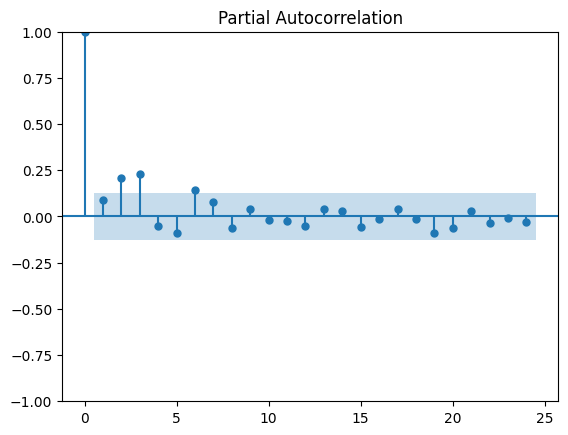

In [5]:
plot_pacf(returns**2)
plt.show()

In [6]:
model = arch_model(returns, p=2, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 642.9893629048389
Iteration:      2,   Func. Count:     13,   Neg. LLF: 841.0768592119719
Iteration:      3,   Func. Count:     20,   Neg. LLF: 753359.1429349526
Iteration:      4,   Func. Count:     26,   Neg. LLF: 574.7835139545944
Iteration:      5,   Func. Count:     32,   Neg. LLF: 562.1518953596474
Iteration:      6,   Func. Count:     38,   Neg. LLF: 560.0414110650315
Iteration:      7,   Func. Count:     43,   Neg. LLF: 560.0108889052608
Iteration:      8,   Func. Count:     48,   Neg. LLF: 559.9855839119582
Iteration:      9,   Func. Count:     53,   Neg. LLF: 559.9853261359917
Iteration:     10,   Func. Count:     58,   Neg. LLF: 559.9853246025416
Iteration:     11,   Func. Count:     62,   Neg. LLF: 559.9853246025418
Optimization terminated successfully    (Exit mode 0)
            Current function value: 559.9853246025416
            Iterations: 11
            Function evaluations: 62
            Gradient evaluations: 11

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -559.985
Distribution:                  Normal   AIC:                           1127.97
Method:            Maximum Likelihood   BIC:                           1141.83
                                        No. Observations:                  236
Date:                Wed, Jul 12 2023   Df Residuals:                      235
Time:                        19:33:39   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0272      0.169     -0.161      0.872 [ -0.358,  0.304]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.2229      0.866      4.877  1.079e-06    [  2.526,  5.920]
alpha[1]       0.0761  6.977e-02      1.091      0.275 [-6.062e-02,  0.213]
alpha[2]       0.4424      0.237      1.868  6.175e-02 [-2.177e-02,  0.907]
===========================================================================

Covariance estimator: robust
"""

### Rolling forecast

In [7]:
model = arch_model(returns, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1028.458222842554


Iteration:      2,   Func. Count:     13,   Neg. LLF: 636.1783641583146
Iteration:      3,   Func. Count:     20,   Neg. LLF: 634.4958924318448
Iteration:      4,   Func. Count:     27,   Neg. LLF: 561.1623609657056
Iteration:      5,   Func. Count:     33,   Neg. LLF: 639.8380002239473
Iteration:      6,   Func. Count:     39,   Neg. LLF: 560.4720408280234
Iteration:      7,   Func. Count:     44,   Neg. LLF: 560.4719942090079
Iteration:      8,   Func. Count:     49,   Neg. LLF: 560.4719924942694
Iteration:      9,   Func. Count:     53,   Neg. LLF: 560.4719924942515
Optimization terminated successfully    (Exit mode 0)
            Current function value: 560.4719924942694
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -560.472
Distribution:                  Normal   AIC:                           1128.94
Method:            Maximum Likelihood   BIC:                           1142.80
                                        No. Observations:                  236
Date:                Wed, Jul 12 2023   Df Residuals:                      235
Time:                        19:33:39   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0187      0.152     -0.123      0.902 [ -0.317,  0.280]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0829      0.439      2.464  1.372e-02    [  0.222,  1.944]
alpha[1]       0.1774      0.104      1.703  8.859e-02 [-2.678e-02,  0.381]
beta[1]        0.6896  8.962e-02      7.694  1.421e-14    [  0.514,  0.865]
===========================================================================

Covariance estimator: robust
"""

In [22]:
rolling_predictions = []
test_size = round(len(df)*(1.0-.8))

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))



In [23]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

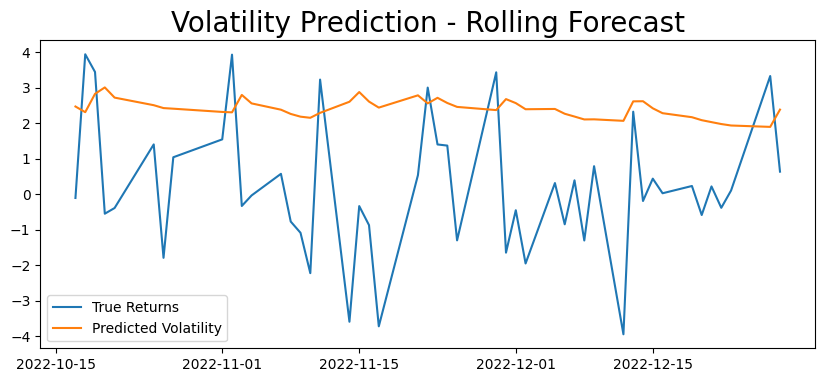

In [24]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)


plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=10)

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

def err_rmse(test_, pred_):
    val = np.sqrt(mean_squared_error(test_, pred_))
    return val

err_rmse(returns[-test_size:],rolling_predictions)


4.064486724325606

### Rolling forecast

In [29]:
def one_step_ahead(df, size_):
    rolling_predictions = []
    rolling_predictions_t = []
    train_size = round(len(df)*size_)
    test_size = round(len(df)*(1.0-size_))

    for i in range(test_size):
        train = returns[:-(test_size-i)]
        model = arch_model(train, p=1, q=0)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

    # for i in range(train_size):
    #     train = returns[:-(test_size-i)]
    #     model = arch_model(train, p=1, q=1)
    #     model_fit = model.fit(disp='off')
    #     pred = model_fit.forecast(horizon=1)
    #     rolling_predictions_t.append(np.sqrt(pred.variance.values[-1,:][0]))  
    
    return err_rmse(returns[-test_size:],rolling_predictions)



def loop_pct():
    dict = {'pct':[], 'res':[]}
    _lst = [x / 100.0 for x in range(80, 100, 5 )]
    for _ in _lst:
        dict['res'].append(one_step_ahead(df, _))
        dict['pct'].append(_)
    return pd.DataFrame(dict)

loop_pct()  SUMPRODUCT(W, Val)/SUM(W)

,pct,res
0,0.80,3.210381
1,0.85,3.372772
2,0.90,3.087511
3,0.95,3.023153


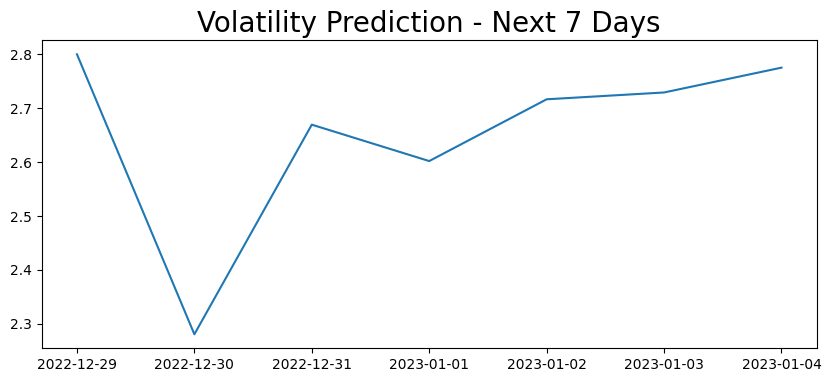

In [13]:
def forecast(returns):
    train = returns
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=7)
    future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
    pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
    plt.figure(figsize=(10,4))
    plt.plot(pred)
    plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

forecast(returns)